In [1]:
import pandas as pd
f = open('清洗后的数据.csv')
file = pd.read_csv(f, encoding = 'utf-8')
file.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,未知,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,未知,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [2]:
# 构建单价变量，即Price / Size
file['avgPrice'] = ( file['Price'] / file['Size'] ) * 10000
file.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year,avgPrice
0,东西,灯市口,未知,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988,104000.000000
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988,117500.000000
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996,66666.666667
3,南,崇文门,未知,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004,107692.307692
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010,110888.888889


In [3]:
region_cnt = file[['Price', 'Region']].groupby('Region').count()
region_cnt = region_cnt.reset_index(drop = False)
region_cnt

,Region,Price
0,东城,1420
1,丰台,2717
2,亦庄开发区,460
3,大兴,2005
4,密云,12
5,平谷,38
6,怀柔,14
7,房山,1373
8,昌平,2653
9,朝阳,2711


In [4]:
region_sum = file[['Price', 'Region']].groupby('Region').sum()
region_sum = region_sum.reset_index(drop = False)
region_sum

,Region,Price
0,东城,1178187.8
1,丰台,1402006.4
2,亦庄开发区,251044.0
3,大兴,901359.2
4,密云,5104.0
5,平谷,11845.0
6,怀柔,10628.0
7,房山,488639.3
8,昌平,1223921.5
9,朝阳,1991173.0


In [5]:
region = pd.merge(region_cnt, region_sum, how = 'left', on = 'Region')
region

,Region,Price_x,Price_y
0,东城,1420,1178187.8
1,丰台,2717,1402006.4
2,亦庄开发区,460,251044.0
3,大兴,2005,901359.2
4,密云,12,5104.0
5,平谷,38,11845.0
6,怀柔,14,10628.0
7,房山,1373,488639.3
8,昌平,2653,1223921.5
9,朝阳,2711,1991173.0


In [6]:
region['avgSumPrice'] = round(region['Price_y'] / region['Price_x'], 3)
region

,Region,Price_x,Price_y,avgSumPrice
0,东城,1420,1178187.8,829.710
1,丰台,2717,1402006.4,516.013
2,亦庄开发区,460,251044.0,545.748
3,大兴,2005,901359.2,449.556
4,密云,12,5104.0,425.333
5,平谷,38,11845.0,311.711
6,怀柔,14,10628.0,759.143
7,房山,1373,488639.3,355.892
8,昌平,2653,1223921.5,461.335
9,朝阳,2711,1991173.0,734.479


In [7]:
xlist = list(region['Region'])
ylist = list(region['avgSumPrice'])
print(xlist)
print(ylist)

['东城', '丰台', '亦庄开发区', '大兴', '密云', '平谷', '怀柔', '房山', '昌平', '朝阳', '海淀', '石景山', '西城', '通州', '门头沟', '顺义']
[829.71, 516.013, 545.748, 449.556, 425.333, 311.711, 759.143, 355.892, 461.335, 734.479, 815.241, 463.301, 809.949, 451.885, 388.849, 520.724]


In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(16,12))
plt.bar(xlist, ylist)
for a, b in zip(xlist, ylist):
    plt.text(a, b + 0.02, b, ha = 'center', va = 'bottom', fontsize = 12)
plt.title('各区总价统计情况')#绘制标题
plt.savefig('./3.1各区总价统计情况柱状图.jpg')#保存图片
plt.show()

<Figure size 1600x1200 with 1 Axes>

In [9]:
region_per = file[['avgPrice', 'Region']].groupby('Region').sum()
region_per = region_per.reset_index(drop = False)
region_per

,Region,avgPrice
0,东城,1.397182e+08
1,丰台,1.562359e+08
2,亦庄开发区,2.157918e+07
3,大兴,9.024164e+07
4,密云,2.871174e+05
5,平谷,1.050431e+06
6,怀柔,5.527094e+05
7,房山,4.831562e+07
8,昌平,1.137987e+08
9,朝阳,1.897013e+08


In [10]:
region2 = pd.merge(region_cnt, region_per, how = 'left', on = 'Region')
region2

,Region,Price,avgPrice
0,东城,1420,1.397182e+08
1,丰台,2717,1.562359e+08
2,亦庄开发区,460,2.157918e+07
3,大兴,2005,9.024164e+07
4,密云,12,2.871174e+05
5,平谷,38,1.050431e+06
6,怀柔,14,5.527094e+05
7,房山,1373,4.831562e+07
8,昌平,2653,1.137987e+08
9,朝阳,2711,1.897013e+08


In [11]:
region2['avgPerPrice'] = round(region2['avgPrice'] / region2['Price'], 3)
region2

,Region,Price,avgPrice,avgPerPrice
0,东城,1420,1.397182e+08,98393.072
1,丰台,2717,1.562359e+08,57503.082
2,亦庄开发区,460,2.157918e+07,46911.268
3,大兴,2005,9.024164e+07,45008.301
4,密云,12,2.871174e+05,23926.449
5,平谷,38,1.050431e+06,27642.930
6,怀柔,14,5.527094e+05,39479.243
7,房山,1373,4.831562e+07,35189.818
8,昌平,2653,1.137987e+08,42894.359
9,朝阳,2711,1.897013e+08,69974.651


In [12]:
xlist = list(region2['Region'])
ylist = list(region2['avgPerPrice'])
for i in range(0, len(ylist)):
    ylist[i] = round(ylist[i], 3)
print(xlist)
print(ylist)

['东城', '丰台', '亦庄开发区', '大兴', '密云', '平谷', '怀柔', '房山', '昌平', '朝阳', '海淀', '石景山', '西城', '通州', '门头沟', '顺义']
[98393.072, 57503.082, 46911.268, 45008.301, 23926.449, 27642.93, 39479.243, 35189.818, 42894.359, 69974.651, 86273.52, 55505.38, 106854.538, 44862.152, 40244.046, 41872.636]


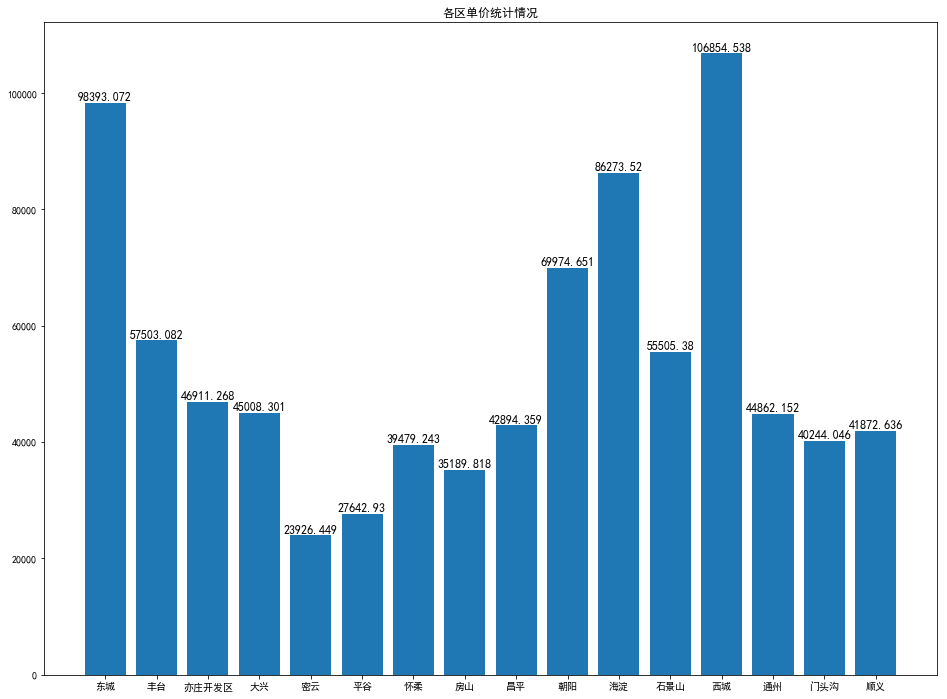

In [13]:
plt.figure(figsize=(16,12))
plt.bar(xlist, ylist)
for a, b in zip(xlist, ylist):
    plt.text(a, b + 0.02, b, ha = 'center', va = 'bottom', fontsize = 12)
plt.title('各区单价统计情况')#绘制标题
plt.savefig('./3.2各区单价统计情况柱状图.jpg')#保存图片
plt.show()